# 1 importation des données

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 2 chargement des donées

In [39]:
data_brut = pd.read_csv('Data/USA_Housing.csv')
data_brut

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [40]:
data=pd.DataFrame({'x':data_brut.iloc[ : , 0 ],'y':data_brut.iloc[ : , 5 ]})
data

,x,y
0,79545.458574,1.059034e+06
1,79248.642455,1.505891e+06
2,61287.067179,1.058988e+06
3,63345.240046,1.260617e+06
4,59982.197226,6.309435e+05
...,...,...
4995,60567.944140,1.060194e+06
4996,78491.275435,1.482618e+06
4997,63390.686886,1.030730e+06
4998,68001.331235,1.198657e+06


# 3 separartion des données

3.1. varaible indépendante et dépendante

In [41]:
x= data.iloc[ : , :-1 ].values
y= data.iloc[ : , -1 ].values

In [42]:
x

array([[79545.45857432],
       [79248.64245483],
       [61287.06717866],
       ...,
       [63390.6868855 ],
       [68001.33123509],
       [65510.58180367]], shape=(5000, 1))

In [43]:
y

array([1059033.55787012, 1505890.91484695, 1058987.98787608, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696],
      shape=(5000,))

3.2. train et test

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=40)
print('x-train shape :',x_train.shape)
print('x-test shape :',x_test.shape)
print('y-train shape :',y_train.shape)
print('y-test shape :',x_test.shape)

x-train shape : (3750, 1)
x-test shape : (1250, 1)
y-train shape : (3750,)
y-test shape : (1250, 1)


# 4 construction du modèle

4.1 construction

In [45]:
modele=LinearRegression()
modele.fit(x_train, y_train)

LinearRegression()

4.2 prediction

In [46]:
predictions=modele.predict(x_test)
resultats=pd.DataFrame({'Prix réels':y_test, 'Prix prédits':predictions})
resultats

,Prix réels,Prix prédits
0,1.435770e+06,1.375828e+06
1,1.668448e+06,1.594792e+06
2,1.762215e+06,1.378886e+06
3,1.106261e+06,1.121330e+06
4,1.051124e+06,1.001248e+06
...,...,...
1245,7.054441e+05,9.409852e+05
1246,1.358647e+06,1.629427e+06
1247,9.750058e+05,1.092890e+06
1248,1.393996e+06,1.437100e+06


4.3. metrics

In [47]:
print('MSE de la regression linéaire :', mean_squared_error(y_test, predictions ))
print('R2 de la regression linéaire :', r2_score(y_test, predictions))

MSE de la regression linéaire : 70345556190.3212
R2 de la regression linéaire : 0.43322233931263276


# 5 visualisation

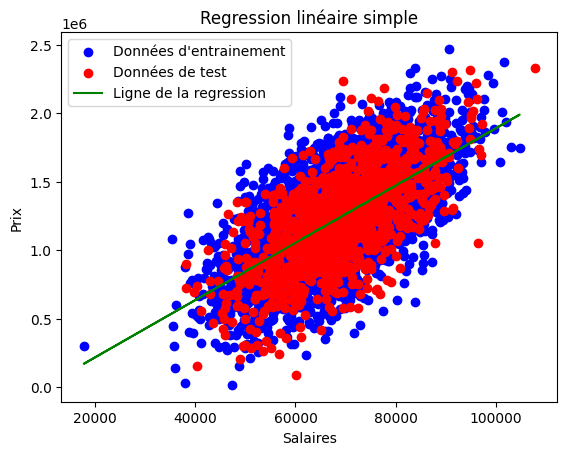

In [48]:
plt.scatter(x_train, y_train, color='blue', label="Données d'entrainement")
plt.scatter(x_test, y_test, color='red', label='Données de test')
plt.plot(x_train, modele.predict(x_train), color='green', label='Ligne de la regression')
plt.xlabel('Salaires')
plt.ylabel('Prix')
plt.title('Regression linéaire simple')
plt.legend()
plt.show()

# 6 prediction simple

In [49]:
print(modele.predict([[8000]]))

[-34856.01337042]


# Différences

In [50]:
difference=y_test-predictions
diff=pd.DataFrame({'Prix réels':y_test, 'Prix prédits':predictions, 'Différences': difference})
diff

,Prix réels,Prix prédits,Différences
0,1.435770e+06,1.375828e+06,59942.165818
1,1.668448e+06,1.594792e+06,73655.637228
2,1.762215e+06,1.378886e+06,383328.555685
3,1.106261e+06,1.121330e+06,-15068.763964
4,1.051124e+06,1.001248e+06,49875.895328
...,...,...,...
1245,7.054441e+05,9.409852e+05,-235541.106927
1246,1.358647e+06,1.629427e+06,-270780.446581
1247,9.750058e+05,1.092890e+06,-117884.027067
1248,1.393996e+06,1.437100e+06,-43104.161504
